# Retail Dataset Exploratory Analysis

## Import pandas library to load the dataset

In [5]:
import pandas as pd

df = pd.read_csv(r"D:\Desktop\Data_Analytics_Projects\Infobyte Internship\retail_sales_dataset.csv")  
df.head()  


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


## Import matplotlib for visualization

In [6]:
import matplotlib.pyplot as plt

## Exploratory Data Analysis - Exploring the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


### Checking For Missing Values

In [8]:
print(df.isnull().sum())

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [9]:
# Checking for duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")

Duplicate rows: 0


In [10]:
df['Date'] = pd.to_datetime(df['Date']).dt.date

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


## Descriptive Statistics

In [15]:
# Summary statistics for numerical columns
df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].describe()


,Age,Quantity,Price per Unit,Total Amount
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,41.39200,2.514000,179.890000,456.000000
std,13.68143,1.132734,189.681356,559.997632
min,18.00000,1.000000,25.000000,25.000000
25%,29.00000,1.000000,30.000000,60.000000
50%,42.00000,3.000000,50.000000,135.000000
75%,53.00000,4.000000,300.000000,900.000000
max,64.00000,4.000000,500.000000,2000.000000


In [16]:
df['Gender'].value_counts()

Gender
Female    510
Male      490
Name: count, dtype: int64

In [19]:
df['Age'].mode()

0    43
1    64
Name: Age, dtype: int64

## Visualization

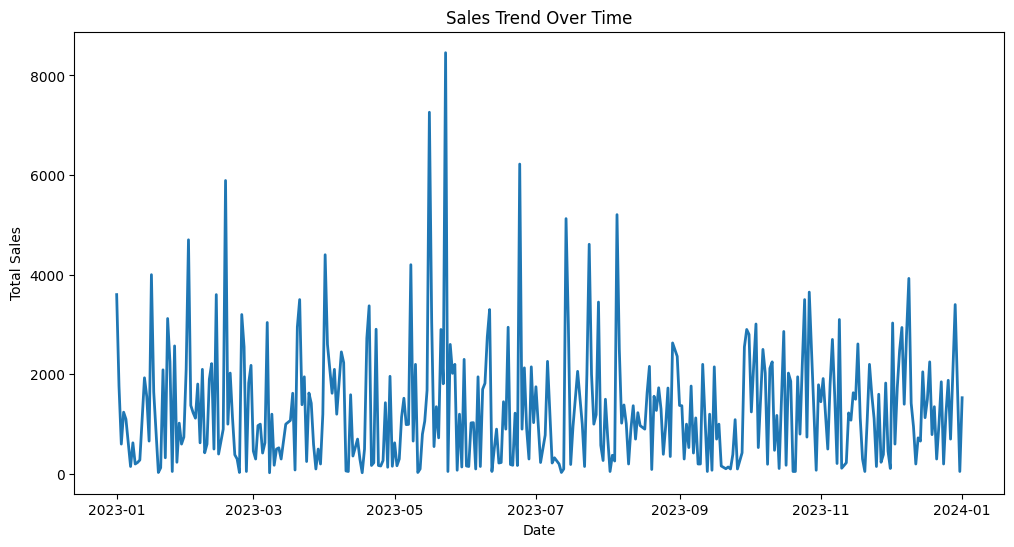

In [20]:
# Aggregate sales by date
df_sales_trend = df.groupby('Date')['Total Amount'].sum()

# Plot sales trends over time
plt.figure(figsize=(12, 6))
df_sales_trend.plot(title="Sales Trend Over Time", xlabel="Date", ylabel="Total Sales", linewidth=2)
plt.show()

In [21]:
import seaborn as sns

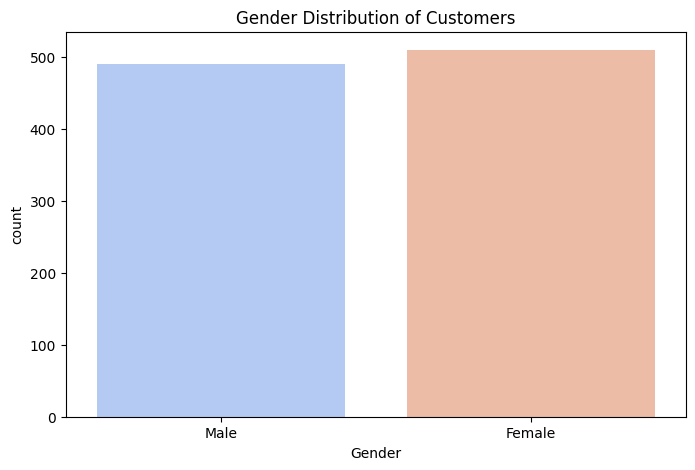

In [25]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Gender', hue='Gender', palette='coolwarm')
plt.title("Gender Distribution of Customers")
plt.show()

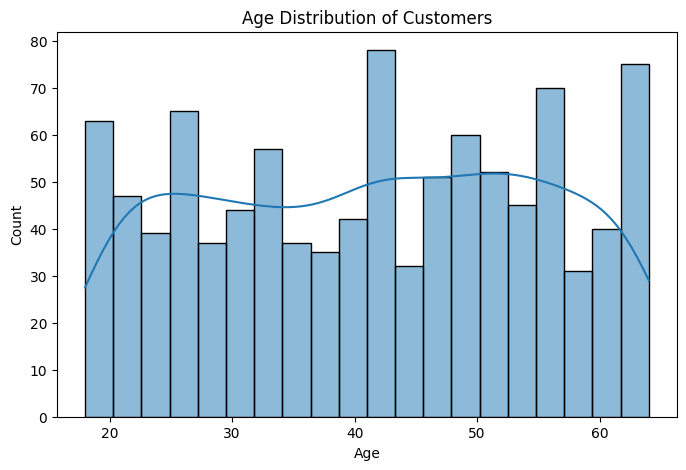

In [26]:
# Age distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution of Customers")
plt.show()

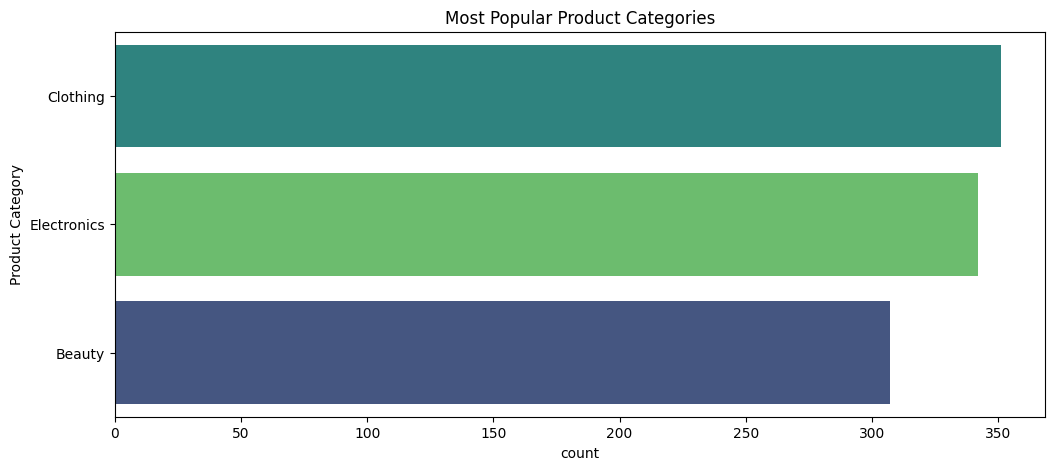

In [28]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, y='Product Category', hue='Product Category', order=df['Product Category'].value_counts().index, palette='viridis')
plt.title("Most Popular Product Categories")
plt.show()

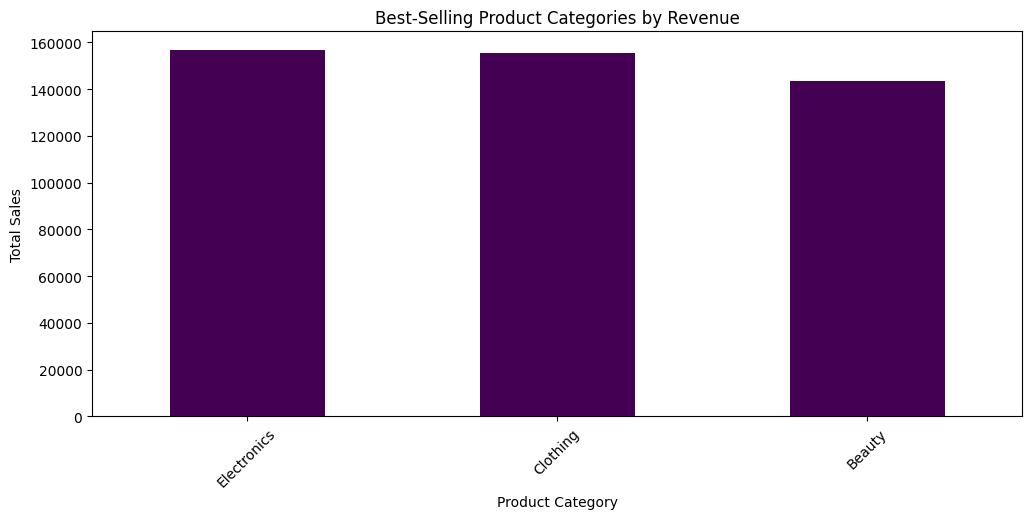

In [29]:
df_products = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 5))
df_products.plot(kind='bar', colormap='viridis')
plt.title("Best-Selling Product Categories by Revenue")
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

In [31]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

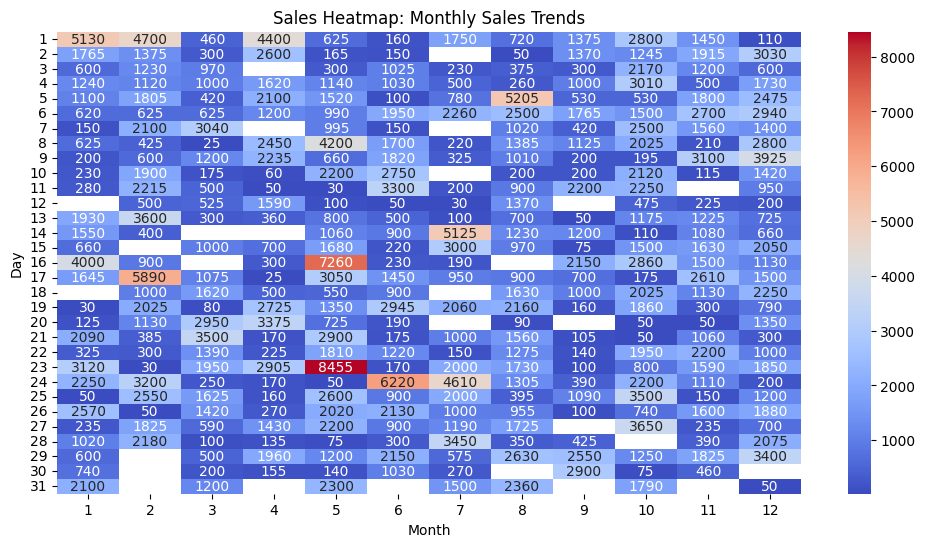

In [32]:
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

sales_pivot = df.pivot_table(values="Total Amount", index="Day", columns="Month", aggfunc="sum")

plt.figure(figsize=(12, 6))
sns.heatmap(sales_pivot, cmap="coolwarm", annot=True, fmt=".0f")
plt.title("Sales Heatmap: Monthly Sales Trends")
plt.show()